In [2]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import math
tf.logging.set_verbosity(tf.logging.ERROR)  # or any {DEBUG, INFO, WARN, ERROR, FATAL}
from tensorflow.examples.tutorials.mnist import input_data
data = input_data.read_data_sets('data/MNIST/', one_hot=True)

Extracting data/MNIST/train-images-idx3-ubyte.gz
Extracting data/MNIST/train-labels-idx1-ubyte.gz
Extracting data/MNIST/t10k-images-idx3-ubyte.gz
Extracting data/MNIST/t10k-labels-idx1-ubyte.gz


In [17]:
#Function used to plot 9 images in a 3x3 grid, and writing the true and predicted classes below each image.
def plot_images(images, cls_true, cls_pred=None):
    assert len(images) == len(cls_true) == 9
    
    # Create figure with 3x3 sub-plots.
    fig, axes = plt.subplots(3, 3)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)

    for i, ax in enumerate(axes.flat):
        # Plot image.
        ax.imshow(images[i].reshape(img_shape), cmap='binary')

        # Show true and predicted classes.
        if cls_pred is None:
            xlabel = "True: {0}".format(cls_true[i])
        else:
            xlabel = "True: {0}, Pred: {1}".format(cls_true[i], cls_pred[i])

        # Show the classes as the label on the x-axis.
        ax.set_xlabel(xlabel)
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
    
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

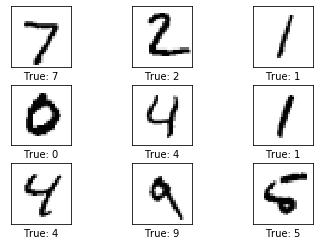

In [18]:
# Get the first images from the test-set.
images = data.test.images[0:9]

# Get the true classes for those images.
cls_true = data.test.cls[0:9]

# Plot the images and labels using our helper-function above.
plot_images(images=images, cls_true=cls_true)

In [4]:
train_batch_size = 64
n_batch = data.train.num_examples // train_batch_size

learning_rate = 1e-4

In [5]:
data.test.cls = np.argmax(data.test.labels, axis=1)
# We know that MNIST images are 28 pixels in each dimension.
img_size = 28

# Images are stored in one-dimensional arrays of this length.
img_size_flat = img_size * img_size

# Tuple with height and width of images used to reshape arrays.
img_shape = (img_size, img_size)

# Number of colour channels for the images: 1 channel for gray-scale.
num_channels = 1

# Number of classes, one class for each of 10 digits.
num_classes = 10

In [15]:
tf.reset_default_graph()

x = tf.placeholder(tf.float32, shape=[None, img_size_flat], name='x')
x_image = tf.reshape(x, [-1, img_size, img_size, num_channels])
y_true = tf.placeholder(tf.float32, shape=[None, num_classes], name='y_true')
y_true_cls = tf.argmax(y_true, dimension=1)

# layer_conv1
net = tf.layers.conv2d(inputs=x_image, name='layer_conv1', padding='same',
                       filters=16, kernel_size=5, activation=tf.nn.relu)
net = tf.layers.max_pooling2d(inputs=net, pool_size=2, strides=2)

# layer_conv2
net = tf.layers.conv2d(inputs=net, name='layer_conv2', padding='same',
                       filters=36, kernel_size=5, activation=tf.nn.relu)
net = tf.layers.max_pooling2d(inputs=net, pool_size=2, strides=2)

print(net)

net = tf.layers.flatten(net)

print(net)

net = tf.layers.dense(inputs=net, name='layer_fc1',
                      units=128, activation=tf.nn.relu)
logits = tf.layers.dense(inputs=net, name='layer_fc_out',
                      units=num_classes, activation=None)
print(logits)

y_pred = tf.nn.softmax(logits=logits)
y_pred_cls = tf.argmax(y_pred, dimension=1)

cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=y_true, logits=logits)

loss = tf.reduce_mean(cross_entropy)

opt = tf.train.AdamOptimizer(learning_rate)
optimizer = opt.minimize(loss)

correct_prediction = tf.equal(y_pred_cls, y_true_cls)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

#trainable_var_list = []
#for var in tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES):
#    trainable_var_list.append(var)
#    print(var)

#trainable_var_list = tf.trainable_variables()

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    loss_list_1 = []
    acc_list_1 = []
    for i in range(50):
        for batch in range(n_batch):
            # Get a batch of training examples.
            # x_batch now holds a batch of images and
            # y_true_batch are the true labels for those images.
            x_batch, y_true_batch = data.train.next_batch(train_batch_size)

            # Put the batch into a dict with the proper names
            # for placeholder variables in the TensorFlow graph.
            feed_dict_train = {x: x_batch,
                               y_true: y_true_batch}

            # Run the optimizer using this batch of training data.
            # TensorFlow assigns the variables in feed_dict_train
            # to the placeholder variables and then runs the optimizer.
            sess.run(optimizer, feed_dict=feed_dict_train)
        los, acc = sess.run([loss, accuracy], feed_dict={x:data.test.images, y_true:data.test.labels})
        loss_list_1.append(los)
        acc_list_1.append(acc)

        print("Epoch: " + str(i) + ", acc: " + str(acc) + ", loss:" + str(los))

Tensor("max_pooling2d_1/MaxPool:0", shape=(?, 7, 7, 36), dtype=float32)
Tensor("flatten/Reshape:0", shape=(?, 1764), dtype=float32)
Tensor("layer_fc_out/BiasAdd:0", shape=(?, 10), dtype=float32)
Epoch: 0, acc: 0.9517, loss:0.1641406
Epoch: 1, acc: 0.9684, loss:0.10334197
Epoch: 2, acc: 0.9763, loss:0.0763209
Epoch: 3, acc: 0.98, loss:0.06215277
Epoch: 4, acc: 0.9845, loss:0.0504426
Epoch: 5, acc: 0.9834, loss:0.050885387
Epoch: 6, acc: 0.9834, loss:0.051117893
Epoch: 7, acc: 0.9854, loss:0.043586645
Epoch: 8, acc: 0.985, loss:0.042920526
Epoch: 9, acc: 0.988, loss:0.03618349
Epoch: 10, acc: 0.9879, loss:0.035209563
Epoch: 11, acc: 0.9888, loss:0.031979144
Epoch: 12, acc: 0.9866, loss:0.039266393
Epoch: 13, acc: 0.989, loss:0.0312753
Epoch: 14, acc: 0.9876, loss:0.034602735
Epoch: 15, acc: 0.9896, loss:0.030623786
Epoch: 16, acc: 0.9871, loss:0.039178852
Epoch: 17, acc: 0.9891, loss:0.03021687
Epoch: 18, acc: 0.9885, loss:0.036003325
Epoch: 19, acc: 0.9901, loss:0.031137003
Epoch: 20, a

In [9]:
tf.reset_default_graph()
x = tf.placeholder(tf.float32, shape=[None, img_size_flat], name='x')
x_image = tf.reshape(x, [-1, img_size, img_size, num_channels])
y_true = tf.placeholder(tf.float32, shape=[None, num_classes], name='y_true')
y_true_cls = tf.argmax(y_true, dimension=1)

# layer_conv1
net = tf.layers.conv2d(inputs=x_image, name='layer_conv1', padding='same',
                       filters=16, kernel_size=5, activation=tf.nn.relu)
net = tf.layers.max_pooling2d(inputs=net, pool_size=2, strides=2)

# layer_conv2
net = tf.layers.conv2d(inputs=net, name='layer_conv2', padding='same',
                       filters=64, kernel_size=5, activation=tf.nn.relu)
net = tf.layers.max_pooling2d(inputs=net, pool_size=2, strides=2)

print(net)

net = tf.layers.flatten(net)

print(net)

net = tf.layers.dense(inputs=net, name='layer_fc1',
                      units=16, activation=tf.nn.relu)
logits = tf.layers.dense(inputs=net, name='layer_fc_out',
                      units=num_classes, activation=None)
print(logits)

y_pred = tf.nn.softmax(logits=logits)
y_pred_cls = tf.argmax(y_pred, dimension=1)

cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=y_true, logits=logits)

loss = tf.reduce_mean(cross_entropy)

opt = tf.train.AdamOptimizer(learning_rate)
optimizer = opt.minimize(loss)

correct_prediction = tf.equal(y_pred_cls, y_true_cls)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

#trainable_var_list = []
#for var in tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES):
#    trainable_var_list.append(var)
#    print(var)

#trainable_var_list = tf.trainable_variables()

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    loss_list_2 = []
    acc_list_2 = []
    for i in range(50):
        for batch in range(n_batch):
            # Get a batch of training examples.
            # x_batch now holds a batch of images and
            # y_true_batch are the true labels for those images.
            x_batch, y_true_batch = data.train.next_batch(train_batch_size)

            # Put the batch into a dict with the proper names
            # for placeholder variables in the TensorFlow graph.
            feed_dict_train = {x: x_batch,
                               y_true: y_true_batch}

            # Run the optimizer using this batch of training data.
            # TensorFlow assigns the variables in feed_dict_train
            # to the placeholder variables and then runs the optimizer.
            sess.run(optimizer, feed_dict=feed_dict_train)
        los, acc = sess.run([loss, accuracy], feed_dict={x:data.test.images, y_true:data.test.labels})
        loss_list_2.append(los)
        acc_list_2.append(acc)

        print("Epoch: " + str(i) + ", acc: " + str(acc) + ", loss:" + str(los))

Tensor("max_pooling2d_1/MaxPool:0", shape=(?, 7, 7, 64), dtype=float32)
Tensor("flatten/Reshape:0", shape=(?, 3136), dtype=float32)
Tensor("layer_fc_out/BiasAdd:0", shape=(?, 10), dtype=float32)
Epoch: 0, acc: 0.9294, loss:0.2548662
Epoch: 1, acc: 0.9581, loss:0.14085725
Epoch: 2, acc: 0.9698, loss:0.10502151
Epoch: 3, acc: 0.9745, loss:0.08848058
Epoch: 4, acc: 0.9768, loss:0.07434189
Epoch: 5, acc: 0.9779, loss:0.06889992
Epoch: 6, acc: 0.982, loss:0.05756293
Epoch: 7, acc: 0.9828, loss:0.056078102
Epoch: 8, acc: 0.9832, loss:0.05192541
Epoch: 9, acc: 0.9845, loss:0.05207993
Epoch: 10, acc: 0.9846, loss:0.052619416
Epoch: 11, acc: 0.9851, loss:0.046890136
Epoch: 12, acc: 0.9846, loss:0.049191497
Epoch: 13, acc: 0.9841, loss:0.045968037
Epoch: 14, acc: 0.9875, loss:0.040181823
Epoch: 15, acc: 0.9885, loss:0.038118273
Epoch: 16, acc: 0.9859, loss:0.047640588
Epoch: 17, acc: 0.987, loss:0.039515916
Epoch: 18, acc: 0.9863, loss:0.044643927
Epoch: 19, acc: 0.9865, loss:0.041508086
Epoch: 

In [11]:
tf.reset_default_graph()
x = tf.placeholder(tf.float32, shape=[None, img_size_flat], name='x')
x_image = tf.reshape(x, [-1, img_size, img_size, num_channels])
y_true = tf.placeholder(tf.float32, shape=[None, num_classes], name='y_true')
y_true_cls = tf.argmax(y_true, dimension=1)

# layer_conv1
net = tf.layers.conv2d(inputs=x_image, name='layer_conv1', padding='same',
                       filters=16, kernel_size=5, activation=tf.nn.relu)
net = tf.layers.max_pooling2d(inputs=net, pool_size=2, strides=2)

# layer_conv2
net = tf.layers.conv2d(inputs=net, name='layer_conv2', padding='same',
                       filters=16, kernel_size=5, activation=tf.nn.relu)
net = tf.layers.max_pooling2d(inputs=net, pool_size=2, strides=2)

# layer_conv3
net = tf.layers.conv2d(inputs=net, name='layer_conv3', padding='same',
                       filters=16, kernel_size=5, activation=tf.nn.relu)
net = tf.layers.max_pooling2d(inputs=net, pool_size=2, strides=2)

print(net)

net = tf.layers.flatten(net)

print(net)

net = tf.layers.dense(inputs=net, name='layer_fc1',
                      units=64, activation=tf.nn.relu)
logits = tf.layers.dense(inputs=net, name='layer_fc_out',
                      units=num_classes, activation=None)
print(logits)

y_pred = tf.nn.softmax(logits=logits)
y_pred_cls = tf.argmax(y_pred, dimension=1)

cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=y_true, logits=logits)

loss = tf.reduce_mean(cross_entropy)

opt = tf.train.AdamOptimizer(learning_rate)
optimizer = opt.minimize(loss)

correct_prediction = tf.equal(y_pred_cls, y_true_cls)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

#trainable_var_list = []
#for var in tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES):
#    trainable_var_list.append(var)
#    print(var)

#trainable_var_list = tf.trainable_variables()

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    loss_list_3 = []
    acc_list_3 = []
    for i in range(50):
        for batch in range(n_batch):
            # Get a batch of training examples.
            # x_batch now holds a batch of images and
            # y_true_batch are the true labels for those images.
            x_batch, y_true_batch = data.train.next_batch(train_batch_size)

            # Put the batch into a dict with the proper names
            # for placeholder variables in the TensorFlow graph.
            feed_dict_train = {x: x_batch,
                               y_true: y_true_batch}

            # Run the optimizer using this batch of training data.
            # TensorFlow assigns the variables in feed_dict_train
            # to the placeholder variables and then runs the optimizer.
            sess.run(optimizer, feed_dict=feed_dict_train)
        los, acc = sess.run([loss, accuracy], feed_dict={x:data.test.images, y_true:data.test.labels})
        loss_list_3.append(los)
        acc_list_3.append(acc)

        print("Epoch: " + str(i) + ", acc: " + str(acc) + ", loss:" + str(los))

Tensor("max_pooling2d_2/MaxPool:0", shape=(?, 3, 3, 16), dtype=float32)
Tensor("flatten/Reshape:0", shape=(?, 144), dtype=float32)
Tensor("layer_fc_out/BiasAdd:0", shape=(?, 10), dtype=float32)
Epoch: 0, acc: 0.9147, loss:0.28316385
Epoch: 1, acc: 0.9421, loss:0.19780764
Epoch: 2, acc: 0.9552, loss:0.15258993
Epoch: 3, acc: 0.9635, loss:0.12132839
Epoch: 4, acc: 0.9693, loss:0.10074593
Epoch: 5, acc: 0.9722, loss:0.09119221
Epoch: 6, acc: 0.975, loss:0.082553856
Epoch: 7, acc: 0.9753, loss:0.073675185
Epoch: 8, acc: 0.9805, loss:0.06568666
Epoch: 9, acc: 0.9789, loss:0.06398877
Epoch: 10, acc: 0.9826, loss:0.05746607
Epoch: 11, acc: 0.9822, loss:0.05778269
Epoch: 12, acc: 0.9837, loss:0.055729598
Epoch: 13, acc: 0.9838, loss:0.05564321
Epoch: 14, acc: 0.9834, loss:0.049430683
Epoch: 15, acc: 0.987, loss:0.04172422
Epoch: 16, acc: 0.986, loss:0.047462102
Epoch: 17, acc: 0.9858, loss:0.04498879
Epoch: 18, acc: 0.9872, loss:0.043585405
Epoch: 19, acc: 0.9875, loss:0.038778048
Epoch: 20, a

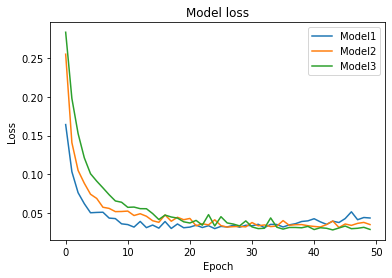

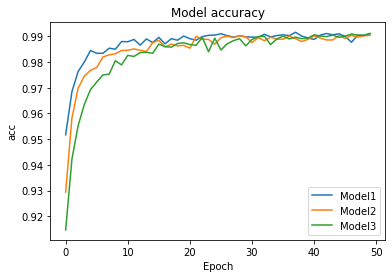

In [16]:
# Plot training  loss values
import matplotlib.pyplot as plt
plt.plot(loss_list_1)
plt.plot(loss_list_2)
plt.plot(loss_list_3)
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(('Model1','Model2','Model3'))
plt.show()

plt.plot(acc_list_1)
plt.plot(acc_list_2)
plt.plot(acc_list_3)
plt.title('Model accuracy')
plt.ylabel('acc')
plt.xlabel('Epoch')
plt.legend(('Model1','Model2','Model3'))
plt.show()